In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn import ensemble

# library to feature importance
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load datasets
wineAllFeatures = pd.read_csv('wineAllFeatures.csv')

In [ ]:
# Display basic information about the dataset
print(wineAllFeatures.info())
print(wineAllFeatures.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1498 non-null   float64
 1   volatile acidity      1498 non-null   float64
 2   citric acid           1498 non-null   float64
 3   residual sugar        1498 non-null   float64
 4   chlorides             1498 non-null   float64
 5   free sulfur dioxide   1498 non-null   float64
 6   total sulfur dioxide  1498 non-null   float64
 7   density               1498 non-null   float64
 8   pH                    1498 non-null   float64
 9   sulphates             1498 non-null   float64
 10  alcohol               1498 non-null   float64
 11  quality               1498 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 140.6 KB
None
(1498, 12)


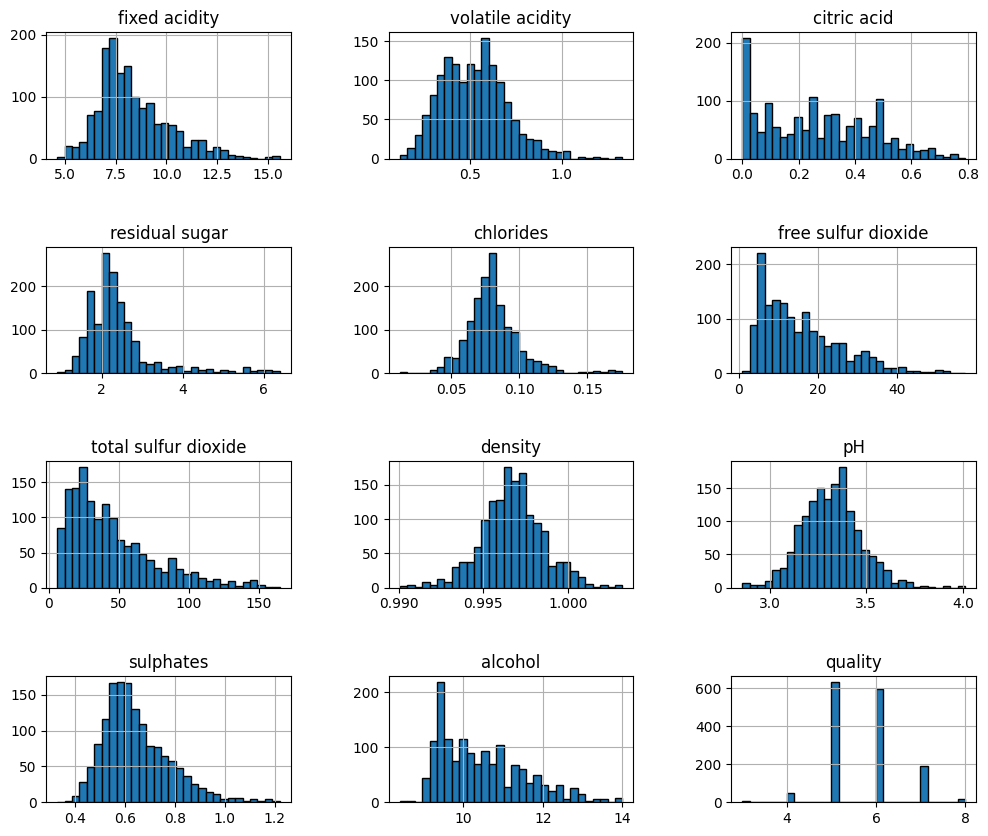

In [ ]:
# Plot histograms for all features
wineAllFeatures.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

In [ ]:
y = wineAllFeatures["quality"]
X = wineAllFeatures.drop(["quality"],axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=13)
regressor.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
median_err = median_absolute_error(y_test, regressor.predict(X_test))
print("The mean squared error (RMSE) Decision tree on test set: {:.4f}".format(rmse))
print("The median absolute error (MAE) Decision tree on test set: {:.4f}".format(median_err))

The mean squared error (RMSE) Decision tree on test set: 0.8233
The median absolute error (MAE) Decision tree on test set: 0.0000


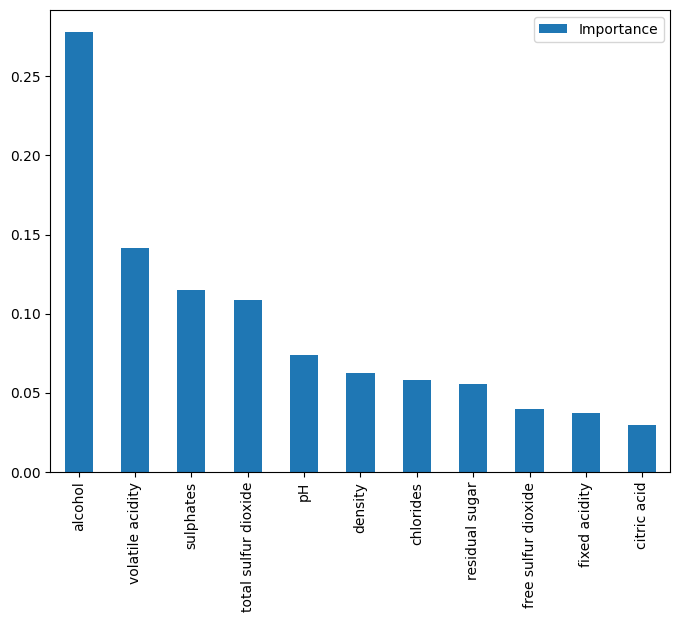

In [ ]:
# Feature importance
feat_importances = pd.DataFrame(regressor.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8, 6))
plt.show()

In [ ]:
#create XGBoost regressor
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
median_err = median_absolute_error(y_test, reg.predict(X_test))
print("The root mean squared error (RMSE) XGBoost on test set: {:.4f}".format(rmse))
print("The median absolute error (MAE) XGBoost on test set: {:.4f}".format(median_err))


The root mean squared error (RMSE) XGBoost on test set: 0.6441
The median absolute error (MAE) XGBoost on test set: 0.4261


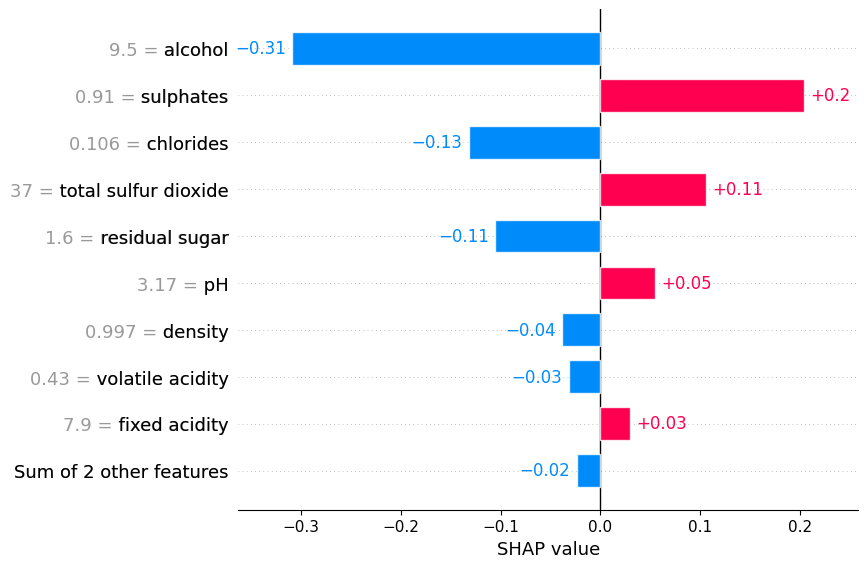

fixed acidity            7.9000
volatile acidity         0.4300
citric acid              0.2100
residual sugar           1.6000
chlorides                0.1060
free sulfur dioxide     10.0000
total sulfur dioxide    37.0000
density                  0.9966
pH                       3.1700
sulphates                0.9100
alcohol                  9.5000
Name: 23, dtype: float64


In [ ]:
shap.initjs()
# Create the explainer
explainer = shap.Explainer(reg,  feature_names = X_train.columns)
# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)
shap.plots.bar(explainer(X_test.values[30]))

# Check values for the 30th instance
print(X_test.iloc[30])

# wykres mowi ile dodaly lub odjely do koncowej wartosci okreslone parametry

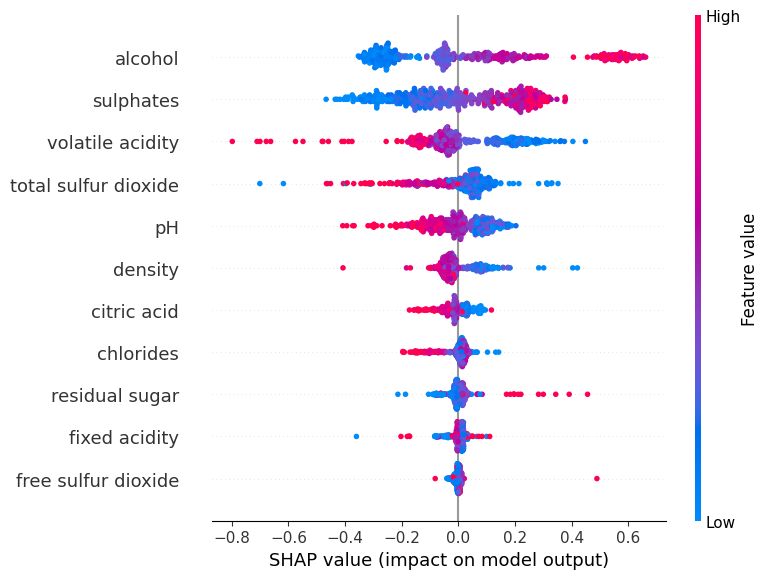

fixed acidity            7.9000
volatile acidity         0.4300
citric acid              0.2100
residual sugar           1.6000
chlorides                0.1060
free sulfur dioxide     10.0000
total sulfur dioxide    37.0000
density                  0.9966
pH                       3.1700
sulphates                0.9100
alcohol                  9.5000
Name: 23, dtype: float64


In [ ]:
shap.initjs()
# Create the explainer
explainer = shap.Explainer(reg, feature_names=X_train.columns)
# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)
# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="dot", feature_names=X_test.columns)

# Check values for the 30th instance
print(X_test.iloc[30])


Intercept 5.591098100805699
Prediction_local [5.62700231]
Right: 5.418267820862509


c:\Users\it\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


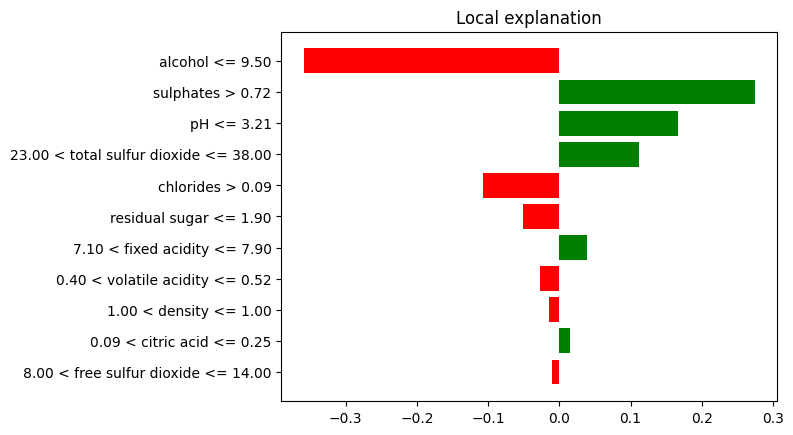

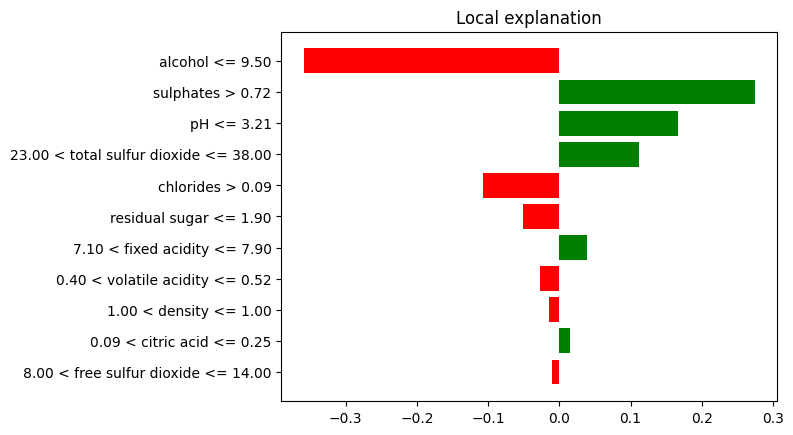

In [ ]:
# Wykres LIME dla wybranej instancji
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), verbose=True, mode='regression')
exp = explainer.explain_instance(X_test.values[30], reg.predict, num_features=11)
exp.as_pyplot_figure()

# wykres mowi ile dodaly lub odjely do koncowej wartosci okreslone parametry